In [256]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [257]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
def display_digit(digit):
    plt.figure(figsize=(4,4))
    plt.imshow(digit.reshape(28,28),cmap="Greys",interpolation="nearest")

In [309]:
training_digits, training_labels = mnist.train.next_batch(55000)
test_digits, test_labels = mnist.test.next_batch(100)

In [310]:
training_digits_full = mnist.train.images
training_digits_full.shape

(55000, 784)

In [311]:
test_digits_full = mnist.test.images
test_digits_full.shape

(10000, 784)

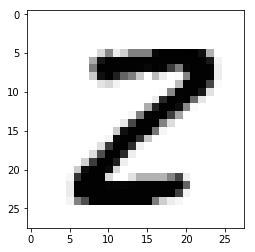

In [312]:
display_digit(training_digits[10])

# TensorFlow Computation Graph 

In [313]:
tf.reset_default_graph()

In [314]:
training_digit_pl = tf.placeholder("float",[None,784])
test_digit_pl = tf.placeholder("float",[784])

In [315]:
from numpy import array
def get_majority_predicted_label(labels, indices):
    
    predicted_labels=[]
    for i in indices:
        predicted_labels.append(labels[i])   
    
    predicted_labels_np = array(predicted_labels)
    print(predicted_labels_np)
    
    counts = np.bincount(predicted_labels)
    return np.argmax(counts)
    

In [316]:
l1_distance = tf.abs(tf.subtract(training_digit_pl,test_digit_pl))

distance_l1 = tf.reduce_sum(l1_distance, axis=1)


# KNN Algorithm - Tensorflow Implementation

In [317]:
pred_KNN_l1 = tf.nn.top_k(tf.negative(distance_l1),k=1)

In [318]:
accuracy = 0.
init = tf.global_variables_initializer()

In [319]:
    sess = tf.Session() 
    sess.run(init)
    
    for i in range(len(test_digits)):
        
        _,indices = sess.run(pred_KNN_l1,
                             feed_dict = {training_digit_pl:training_digits,
                                          test_digit_pl: test_digits[i,:]})
        
        print(indices.shape)
        predicted_label = get_majority_predicted_label(training_labels,indices)
        
        print("test",i,"prediction:",predicted_label,
                "True_label",test_labels[i])
        
        if predicted_label == test_labels[i]:
            accuracy += 1./len(test_digits)
            
print("Done!")
print("Accuracy:", accuracy)

(1,)
[0]
test 0 prediction: 0 True_label 0
(1,)
[5]
test 1 prediction: 5 True_label 5
(1,)
[3]
test 2 prediction: 3 True_label 3
(1,)
[5]
test 3 prediction: 5 True_label 5
(1,)
[3]
test 4 prediction: 3 True_label 3
(1,)
[7]
test 5 prediction: 7 True_label 7
(1,)
[3]
test 6 prediction: 3 True_label 3
(1,)
[0]
test 7 prediction: 0 True_label 0
(1,)
[4]
test 8 prediction: 4 True_label 1
(1,)
[9]
test 9 prediction: 9 True_label 9
(1,)
[3]
test 10 prediction: 3 True_label 3
(1,)
[5]
test 11 prediction: 5 True_label 5
(1,)
[9]
test 12 prediction: 9 True_label 9
(1,)
[1]
test 13 prediction: 1 True_label 1
(1,)
[1]
test 14 prediction: 1 True_label 1
(1,)
[0]
test 15 prediction: 0 True_label 0
(1,)
[1]
test 16 prediction: 1 True_label 1
(1,)
[9]
test 17 prediction: 9 True_label 5
(1,)
[2]
test 18 prediction: 2 True_label 2
(1,)
[6]
test 19 prediction: 6 True_label 6
(1,)
[2]
test 20 prediction: 2 True_label 2
(1,)
[9]
test 21 prediction: 9 True_label 9
(1,)
[8]
test 22 prediction: 8 True_label 